# Part 1: create the matrix A

### Importing libraries

Here, we import the Linear Algebra library and Random and use a pseudo-random number
generator. We use abs (Absolute value) on the random value generated as rand can generate negative integers, which cannot be set as the Random seed (seeds need to be positive integers).

In [207]:
import Random
import LinearAlgebra
import Printf
using Printf
import Plots
code_seed = abs(rand(Int32))
Random.seed!(code_seed)

MersenneTwister(1008625597)

### Generating A

Here, we first define X and X inv, both random matrices of size 8x8. Then, we define a list with the eigenvalues and build Lambda, the diagonal matrix with the eigenvalues of A on its diagonal. We assign the eigenvalues of our list as the diagonal entries of Lambda using LinearAlgebra.Diagonal. Finally, we construct A by multiplying the 3 matrices in the right order.

In [208]:
dim = 8
X = randn(dim,dim)
X_inv = inv(X)

evals = [1, 0.2, 0.05, 0.017, 0.0085, 0.0042, 0.0021, 0.0011]

lambda = LinearAlgebra.Diagonal(evals)
A = X*lambda*X_inv

8×8 Matrix{Float64}:
  0.65838     0.234388    -0.133813   …   0.379036    -0.529478   -0.81763
 -0.18896    -0.00411365   0.0145547     -0.19734      0.0970866   0.290469
  0.0180012  -0.0428753    0.029125       0.09432      0.0465222  -0.0883335
 -0.935056   -0.383913     0.228614      -0.427871     0.841905    1.07787
  0.485513    0.171141    -0.0864185      0.31683     -0.358401   -0.655212
 -0.159999   -0.135223     0.063722   …   0.00708665   0.189275    0.140391
  0.848593    0.329897    -0.187566       0.44205     -0.715098   -1.02976
 -0.230331   -0.0852718    0.0360884     -0.172201     0.151079    0.333649

### Checking the eigenvalues

Here, we print out the eigenvalues of A to make sure they are equal to the list of eigenvalues we specified earlier. This way, we make sure we have built A correctly. As we can see, they match the eigenvalues of the initial list.

In [209]:
print(LinearAlgebra.eigvals(A))

[0.0011000000000003203, 0.0021000000000001057, 0.004200000000000211, 0.008499999999999945, 0.016999999999999692, 0.050000000000000204, 0.19999999999999982, 0.9999999999999999]

# Part 2: Orthogonal iteration

### Define a random matrix Q

In [210]:
code_seed = abs(rand(Int32))
Random.seed!(code_seed)
Q = randn(dim,dim)

8×8 Matrix{Float64}:
  0.873779   -1.14424   -0.167563   …  -0.260544      0.83911   -0.030432
  1.83627     0.702862  -0.833124       0.0804597    -1.26167    1.37952
 -0.0498556   0.142686  -1.48064       -1.27503       0.454852  -0.145109
  0.956868   -0.313217  -0.105824      -0.963816     -0.36811    1.78127
  0.190166   -0.509043   0.73171        0.404248      0.602771   0.135459
 -0.68124    -0.14499   -0.0246341  …  -0.55543      -0.755597   2.33454
 -0.914059   -0.269708  -0.481104      -0.000556802  -0.221875  -2.14286
  1.22642    -2.11405    0.172256       0.0888671    -0.484466   0.0139387

# Orthogonal iteration function

The function prints the iteration number, multiplies A by Qk and assigns this value to Qk, computes the QR decomposition of Qk and assign the new value of Qk obtained from QR to Qk. Finally, it takes the diagonal entries of Rk and prints them with a maximum of 4 significant digits.

In [211]:
function orthogonal_iteration(A, Qk, n_iterations)
    for k=1: n_iterations
        @printf("Iteration %d:",k)
        print('\n')
        print('\n')
        Qk = A * Qk
        Qk, Rk = LinearAlgebra.qr(Qk)
        diag_Rk = LinearAlgebra.diag(Rk,0)
        string = join([@sprintf "%3.4f" x for x in diag_Rk], ", ")
        print(string)
        print('\n')
        print('\n')
    end
end

orthogonal_iteration (generic function with 1 method)

###  Orthogonal iteration for A and 5 iterations, printing the values on the diagonal of Rk

In [212]:
n = 5

5

In [213]:
orthogonal_iteration(A,Q,n)

Iteration 1:

0.9440, -2.0693, 0.0374, 0.0238, -0.0633, 0.0017, 0.0020, 0.0015

Iteration 2:

0.8293, 0.2615, 0.0605, 0.0113, 0.0090, 0.0047, 0.0020, 0.0011

Iteration 3:

1.0005, 0.2022, -0.0547, -0.0152, 0.0083, -0.0044, 0.0020, -0.0011

Iteration 4:

1.0021, 0.2000, 0.0514, -0.0164, -0.0085, 0.0043, 0.0021, 0.0011

Iteration 5:

1.0005, 0.2000, 0.0504, 0.0168, 0.0085, 0.0042, 0.0021, 0.0011



We observe that at iteration 5, the entries on the diagonal of Rk are almost equal to the eigenvalues of our initial list, which were:

[1, 0.2, 0.05, 0.017, 0.0085, 0.0042, 0.0021, 0.0011]

# Part 3: 2-norm of the sub-block of Ak

### Repeat this process for different values of k

In [214]:
function get_2_norm_for_k!(k, p, norm_vector, Qk)
    for i=1: k
        Qk = A * Qk
        Qk, Rk = LinearAlgebra.qr(Qk)
        Qk_T = LinearAlgebra.transpose(Qk)
        A_k = Qk_T * A * Qk
        A_k_block = view(A_k, p + 1 : 8, 1 : p)
        A_k_block_norm = LinearAlgebra.norm(A_k_block, 2)
        print(A_k_block_norm)
        push!(norm_vector,A_k_block_norm)
    end
end

get_2_norm_for_k! (generic function with 1 method)

### Build the norms vector

In [215]:
code_seed = abs(rand(Int32))
Random.seed!(code_seed)
Q = randn(dim,dim)

norms = Vector{Float64}()

k = 5
p = 4

get_2_norm_for_k!(k, p, norms, Q)

0.219104531917786870.044199385418728380.0102260660848713810.002854565097951820.0010537136466663394

### Build the decay vector

In [216]:
decay = Vector{Float64}()

for i=1: k
    decay_value = (evals[5] / evals[4])^i
    push!(decay, decay_value)
end

### Build the x-axis vector

In [217]:
x_axis = Vector{Int64}()

for i=1: k
    push!(x_axis,i)
end

### Plot the results

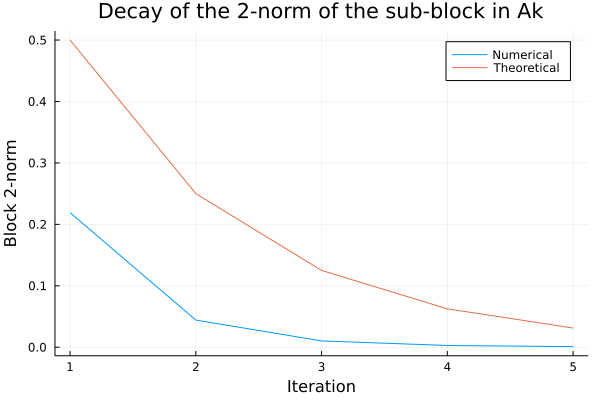

In [218]:
Plots.plot(
    x_axis,
    [norms, decay],
    labels=["Numerical" "Theoretical"], 
    xlabel = "Iteration", 
    ylabel = "Block 2-norm",
    title = "Decay of the 2-norm of the sub-block in Ak"
)

# Part 4: Convergence of the pth eigenvalue

### Redefine the initial function, set the value of k, build a random Q matrix and build the axis vector

In [219]:
k = 5

5

In [220]:
function get_eval_convergence!(A, Qk, k, p, eval_conv)
    for i=1: k
        Qk = A * Qk
        Qk, Rk = LinearAlgebra.qr(Qk)
        diag_Rk = LinearAlgebra.diag(Rk,0)
        push!(eval_conv,abs(diag_Rk[p]-evals[p]))
    end
end

get_eval_convergence! (generic function with 1 method)

In [221]:
code_seed = abs(rand(Int32))
Random.seed!(code_seed)
Q = randn(dim,dim)

8×8 Matrix{Float64}:
 -0.806666   0.52996   -0.325298  …   0.614155     1.29463    0.131863
  0.605228  -1.66281   -0.454675      1.58257      0.169137   0.221491
 -0.22202   -1.49554   -0.361873      0.131246     1.05884   -1.91015
 -0.678096  -0.847046   0.359605     -0.562193     0.715151  -0.894865
  1.01276   -1.76764   -2.01535       0.808967     0.801192   0.385777
  0.922778  -0.897302   0.207718  …  -1.47275      0.603272   0.374916
 -1.04709   -0.783792   0.161653     -0.00404962   0.367969  -0.428563
 -0.339597   0.626827  -1.47274       0.206651    -0.360076  -1.04025

In [222]:
x_axis = Vector{Int64}()

for i=1: k
    push!(x_axis,i)
end

## Convergence for p = 1 using a semi-logarithmic plot

In [223]:
eval_conv_1 = Vector{Float64}()
p = 1
evals = [1, 0.2, 0.05, 0.017, 0.0085, 0.0042, 0.0021, 0.0011]

get_eval_convergence!(A, Q, k, p, eval_conv_1)

decay = Vector{Float64}()

for i=1: k
    decay_value = (evals[2] / evals[1])^(i)
    push!(decay, decay_value)
end

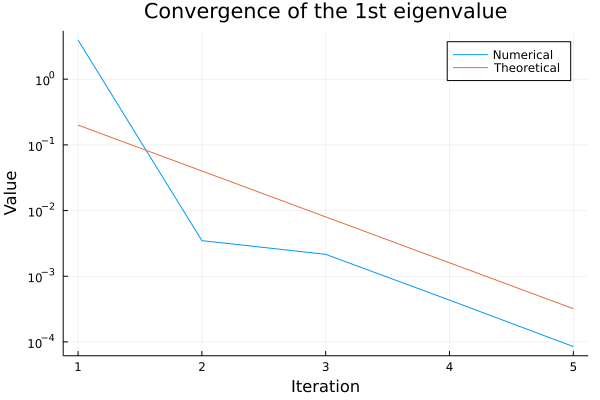

In [224]:
Plots.plot(
    x_axis,
    [eval_conv_1,decay], 
    yaxis=:log,
    labels=["Numerical" "Theoretical"], 
    xlabel = "Iteration", 
    ylabel = "Value",
    title = "Convergence of the 1st eigenvalue"
)

## Convergence for p = 2 using a semi-logarithmic plot

In [225]:
eval_conv_2 = Vector{Float64}()
p = 2
get_eval_convergence!(A, Q,k, p, eval_conv_2)

decay = Vector{Float64}()

for i=1: k
    decay_value = max((evals[p+1] / evals[p])^(i),(evals[p] / evals[p-1])^(i))
    push!(decay, decay_value)
end

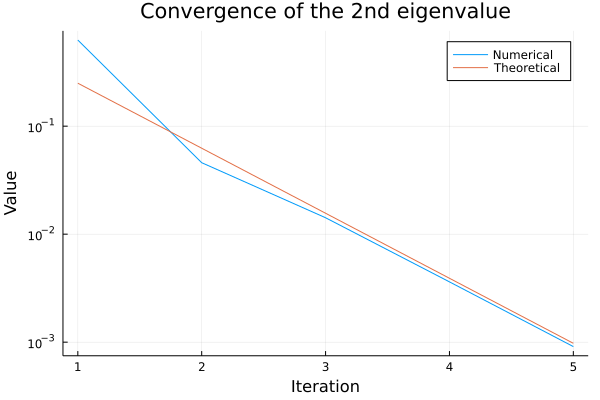

In [226]:
Plots.plot(
    x_axis,
    [eval_conv_2,decay], 
    yaxis=:log,
    labels=["Numerical" "Theoretical"], 
    xlabel = "Iteration", 
    ylabel = "Value",
    title = "Convergence of the 2nd eigenvalue"
)

## Convergence for p = 3 using a semi-logarithmic plot

In [227]:
eval_conv_3 = Vector{Float64}()
p = 3
get_eval_convergence!(A,Q,k, p, eval_conv_3)

decay = Vector{Float64}()

for i=1: k
    decay_value = max((evals[p+1] / evals[p])^(i),(evals[p] / evals[p-1])^(i))
    push!(decay, decay_value)
end

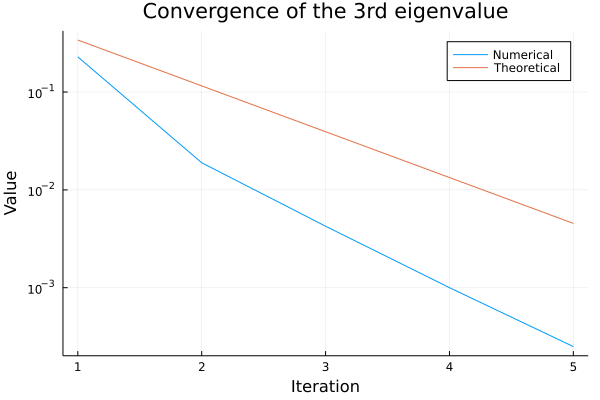

In [228]:
Plots.plot(
    x_axis,
    [eval_conv_3,decay], 
    yaxis=:log,
    labels=["Numerical" "Theoretical"], 
    xlabel = "Iteration", 
    ylabel = "Value",
    title = "Convergence of the 3rd eigenvalue"
)